# 11. Невронски мрежи

Еден од најпознатите модели за машинско учење, којшто лежи во основата на длабокото учење се вештачките **невронски мрежи** (анг. Neural Networks - NN).
Во ова поглавје ќе научите повеќе за основните градбени единки на невронските мрежи - софтверските неврони. 

## 11.0. Биолошки неврон

**Нервните клетки** или **невроните** се основните градбени единки на нервниот систем.
За разлика од другите клетки во телото, невроните се карактеризираат со надразливост, осетливост и спроводливост.
Овие карактеристики се во согласност со нивната специфична функција.

Градбата на невроните е прикажана на сликата 1 и содржи:
    - тело на нервната клетка или невроцит,
    - дендрити (влезови), и
    - нервно влакно или аксон (излез).

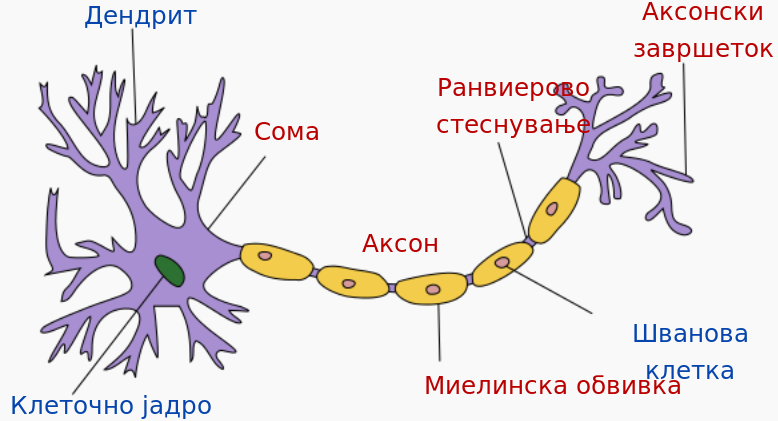

**Слика 1** Градба на невроните.

За споредба на сликата 2 е прикажан неокортикален пирамидален неврон обоен по методот на Голџи.
Се забележуваат многубројните дендрити кои излегуваат, всушност водат кон невроцитот.

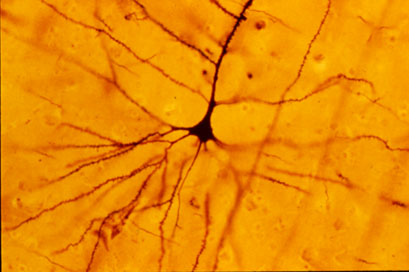

**Слика 2** Човечки неврон виден под микроскоп.

Основната функција на невронот е да реагира на побудата на неговите влезови со генерирање на нервни импулси (акциски потенцијали).
Побудите можат да бидат позитивни (екситаторски) - оние кои ја зголемуваат електричната поларизација на невронот,  и негативни (инхибиторски) - оние кои ја намалуваат неговата поларизација. 

Кога сумата на побуди ќе го надмине напонот на праг, во невронот ќе настане брза промена на потенцијалот (деполаризација) која ќе пропагира долж излезниот аксон во вид на нервен импулс.
На крајот на невронот, овој импулс ја игра улогата на побуда за друг неврон, мускулно влакно и др. 

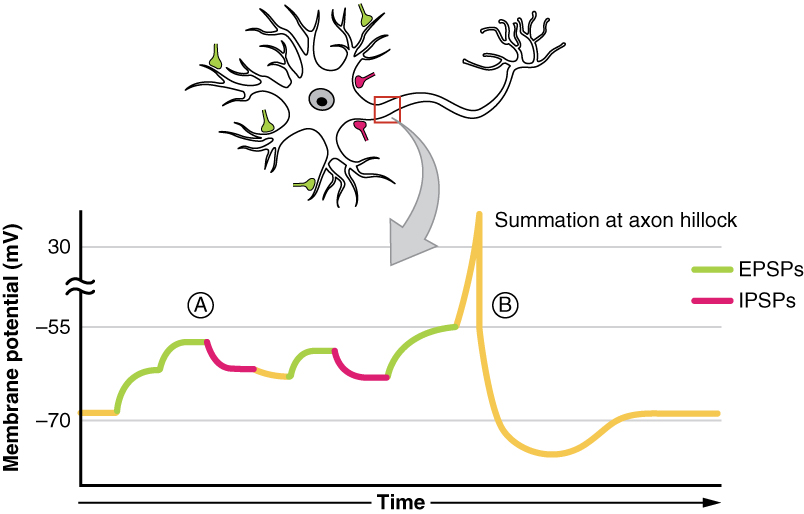

**Слика 3** Сумирање на побудите во телото на невронот.

## 11.1. Софтверски неврон

Основната градбена единка на невронските мрежи се **софтверските неврони** чиј начин на работа е инспириран од физиологијата на биолошките неврони.
Понатаму во текстот ќе зборуваме само за софтверски неврони.

Секој неврон има $K$ влезови на кои се носи влезниот вектор $\mathbf{x} = [x_0, x_1, ... \, x_{K-1}]$.
Влезовите на невронот се скалирани со тежински коефициенти, или тежини $w_k$, кои можат да бидат и негативни.
Активацијата на невронот $a$ се добива преку сумирање на скалираните влезови.

Конечно, излезот на невронот $y$ се одредува преку излезната нелинеарност $f(a)$.
Притоа, вообичаено се додава и **коефициент на поместување** кој одговара на прагот на излезната нелинеарност.

$ y = f(a) = f(\sum_{k=0}^{K-1}w_k x_k + b) = f(\mathbf{w} \mathbf{x}^T + b) $

Тука, $\mathbf{w} = [w_0, w_1, ... \, w_{K-1}]$ е векторот на тежини на овој неврон.
Ако на влез се донесат низа на $N$ примероци од влезните податоци $\mathbf{x}_n$, ќе имаме:

$ y_n = f(a_n) = f(\mathbf{w} \mathbf{x}_n^T + b) \quad \text{за} \,\, n = 0, 1, 2, ... \, N-1 \, , $

$ \mathbf{y} = f(\mathbf{a}) = f(\mathbf{w} \mathbf{X}^T + b) \, $

Тука, со $\mathbf{X}$ е означена матрицата по чии редици се поставени влезните примероци $\mathbf{x}_n$.

Моделите за регресија базирани на употреба на еден неврон се нарекуваат **линеарна регресија**, додека оние за класификација се нарекуваат **логистичка регресија**.

## 11.2. Имплементација на софтверски неврон

Да имплементираме еден софтверски неврон со Пајтон.

In [1]:
import numpy as np


class Neuron:
    def __init__(self, weights=None, bias=None, n_inputs=None):
        if weights is not None:
            self.weights = weights
            self.bias = bias
        else:
            self.weights = np.random.normal(size=n_inputs)
            self.bias = np.random.normal()

    def __call__(self, x):
        a = np.sum(self.weights * x) + self.bias
        y = 1 if a > 0 else 0
        return y

Со овој код дефиниравме нова класа Неврон за која направивме функција за иницијализација, т.н. конструктор (`__init__`) и функција која ќе ја извршува невронот кога ќе го повикаме (`__call__`).

Ајде да иницијализираме еден неврон со два влеза со тежински коефициенти `1` и коефициент на поместување `-1`.

In [2]:
neuron = Neuron([1, 1], -1)
print(neuron.weights, neuron.bias)

[1, 1] -1


За да видиме која логичка функција ја извршува нашиот неврон ќе дефинираме влезна матрица на комбинации од логички `0` и `1` и ќе го испечатиме излезот на невронот:

In [3]:
xs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    ])
for x in xs:
    print(x, "->", neuron(x))

[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


Може да видиме дека невронот ја извршува логичката функција `И` (`AND`).

*Вежба*: иницијализирајте неврон со влезни тежини `-1` и коефициент на поместување `1`. Која логичка функција ја извршува овој неврон?

## 11.3. Тренирање на неврон

За проба да иницијализираме неврон со случајни вредности на тежините и коефициентот на поместување и да видиме која логичка функција ќе ја извршува.
Најпрвин ќе ја поставиме состојбата `42` на генераторот на случајни броеви за повторливост на резултатите.

In [4]:
np.random.seed(42)
neuron = Neuron(n_inputs=2)
print(neuron.weights, neuron.bias)

for x in xs:
    print(x, "->", neuron(x))

[ 0.49671415 -0.1382643 ] 0.6476885381006925
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


Можеме да видиме дека случајно иницијализираниот неврон постојано дава `1` на неговиот излез, односно не извршува некоја логичка функција.

Всушност, невроните во вештачките невронски мрежи секогаш се иницијализираат случајно, а дури потоа се тренираат за да „научат” некоја логичка или друга функција, на пр. препознавање на рачно напишани броеви. 

Проблемот на тренирање на невронските мрежи се сведува на промена на тежините и коефициентите на поместување на секој од невроните во насока на намалување на грешката која ја прави мрежата.
Еден начин тоа да се направи е со примена на алгоритамот **спуштање по градиентот (ГД)**, кој е итеративен алгоритам за пронаоѓање на минимумот на дадена функција.

За да го примениме овој алгоритам за учење дефинираме **функција на загуба** $\mathcal{L}(y, \tilde{y})$ која зависи од точниот, т.е. целниот излез $y$ и излезот добиен од мрежата $\tilde{y}$, кој пак зависи од параметрите на невронската мрежа $\mathbf{\theta}$ и влезниот вектор $\mathbf{x}$.
Така, за да дојдеме до минимумот на функцијата $\mathcal{L}$ промената на $l$-тиот параметар во време $i$ кој го означуваме со $\theta_l^i$, треба да ја направиме во насока спротивна на градиентот:

$$
  \theta_l^{i+1} = \theta_l^i - \frac{\partial \mathcal{L}}{\partial \theta_l} \cdot \eta
      \quad \, ,
$$

каде $\frac{\partial \mathcal{L}}{\partial \theta_l}$ е парцијалниот извод на функцијата на грешка во однос на параметарот $\theta_l$, а со $\eta$ е означена големината на чекорот кој го земаме во насока кон минимумот на функцијата на загуба, кој се нарекува и чекор на учење (анг. *learning rate*).

Пресметување на градиентот за нагодување на параметрите $\theta$ на невронската мрежа започнува со пресметка на градиентите на излезот и оди наназад до почетокот на мрежата.
Поради тоа, овој процес се нарекува **пропагација наназад**.

## 11.4. Имплементирање на тренирање на неврон

За да можеме да го тренираме нашиот неврон ќе имплементираме функција `backprop()` за пресметка на градиентот на загубата во однос на двете тежини и коефициентот на поместување. 
Исто така, ќе имплементираме функција за промена на параметрите на невронот според пресметаниот градиент и чекорот на учење `update()`. 
Конечно, ќе имплементираме функција која ќе можеме да ја повикаме за да извршиме тренирање на невронот `fit()`.

In [5]:
class Neuron:
    def __init__(self, weights=None, bias=None, n_inputs=None):
        if weights is not None:
            self.weights = weights
            self.bias = bias
        else:
            if n_inputs is None:
                raise ValueError("n_inputs must be provided!")
            self.weights = np.random.normal(size=n_inputs)
            self.bias = np.random.normal()

    def __call__(self, x):
        a = np.sum(self.weights * x) + self.bias
        y = 1 if a > 0 else 0
        return y

    def backprop(self, loss, x):
        # loss = y - y_pred = y - (sum(w * x) + b)
        self.grad_weights = - loss * x
        self.grad_bias = - loss

    def update(self):
        self.weights = self.weights - self.grad_weights * self.learn_rate
        self.bias = self.bias - self.grad_bias * self.learn_rate

    def fit(self, xs, ys, epochs=20, learn_rate=0.1, verbose=True):
        self.learn_rate = learn_rate
        for epoch in range(epochs):
            if verbose:
                print(f"{epoch + 1}/{epochs} loss = ", end="")
            epoch_loss = 0
            for x, y in zip(xs, ys):
                y_pred = self(x)
                loss = y - y_pred
                self.backprop(loss, x)
                self.update()
                epoch_loss += loss
            if verbose:
                print(epoch_loss / x.shape[0])

Да ги искористиме овие функции за да го истренираме невронот кој го добивме со случајна иницијализација на параметрите.
За таа цел ќе дефинираме посакуван излез `ys` за секоја редица од табелата на влезни комбинации `xs`.
Ова ќе претставува функцијата која сакаме нашиот неврон да ја научи, а заедно со влезната табела тие ќе го сочинуваат **множеството за тренирање**.

In [6]:
np.random.seed(42)
neuron = Neuron(n_inputs=2)
print(neuron.weights, neuron.bias)
for x in xs:
    print(x, "->", neuron(x))

ys = np.array([0, 0, 0, 1])  # AND

[ 0.49671415 -0.1382643 ] 0.6476885381006925
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


Со ова спремни сме да го истренираме нашиот неврон со следната наредба:

In [7]:
neuron.fit(xs, ys)

1/20 loss = -1.5
2/20 loss = -1.5
3/20 loss = -0.5
4/20 loss = 0.0
5/20 loss = 0.0
6/20 loss = -0.5
7/20 loss = 0.0
8/20 loss = 0.0
9/20 loss = -0.5
10/20 loss = 0.0
11/20 loss = 0.0
12/20 loss = 0.0
13/20 loss = 0.0
14/20 loss = 0.0
15/20 loss = 0.0
16/20 loss = 0.0
17/20 loss = 0.0
18/20 loss = 0.0
19/20 loss = 0.0
20/20 loss = 0.0


Можеме да видиме како грешката опаѓа и конвергира кон 0 во процесот на тренирање.
За да се увериме во резултатите од тренирањето можеме да го употребиме следниот код:

In [8]:
print(neuron.weights, neuron.bias)
for x in xs:
    print(x, "->", neuron(x))

[0.19671415 0.0617357 ] -0.2523114618993075
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


Можеме да видиме дека навистина нашиот неврон ја научи логичката функција `И` која му ја зададовме!
Дополнително може да видиме дека вредностите на параметрите кои ги добивме не се истите со оние кои ги внесовме рачно за да ја добиеме функцијата `И` погоре.

*Вежба*: Направете нови 3 неврони и истренирајте ги да ги извршуваат логичките функции `ИЛИ`, `НИ` и `НИЛИ`. 

*Вежба*: Направете нов неврон и истренирајте го да ја извршува логичката функција `ХИЛИ`. Дали невронот може да ја научи оваа функција?

## 11.5. Анимација на процесот на тренирање

Со употреба на опцијата за интерактивно плотирање која ја има библиотеката `matplotlib` можеме да го визуелизираме процесот на тренирање на нашиот неврон.
Тоа може да го направиме со следниот код:

<IPython.core.display.Javascript object>


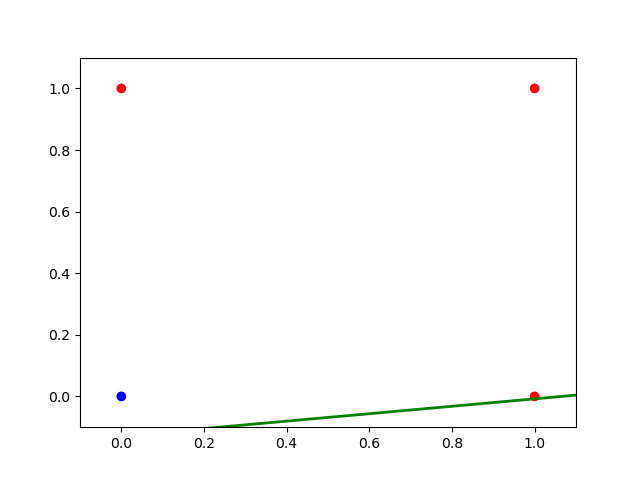

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

ys = np.array([0, 1, 1, 1])
fig, ax = plt.subplots()
x_axis = np.array([-.1, 1.1])
colors = {0: "b", 1: "r"}
ax.scatter(xs[:, 0], xs[:, 1], c=[colors[y] for y in ys])
decision_boundary = x_axis 
line, = ax.plot(x_axis, decision_boundary, 'g', lw=2)
ax.set_xlim([-.1, 1.1])
ax.set_ylim([-0.1, 1.1])

def animate(epochs):
    np.random.seed(100)
    neuron = Neuron(n_inputs=2)
    neuron.fit(xs, ys, epochs=epochs, learn_rate=0.01, verbose=False)
    decision_boundary = (
        -neuron.weights[0] * x_axis - neuron.bias
        ) / neuron.weights[1]
    line.set_data((x_axis, decision_boundary))
    return line

anim = FuncAnimation(fig, animate, frames=300, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

*Вежба*: Пробајте да ја смените логичката функција, состојбата на генераторот на случајни броеви и чекорот на учење.